In [1]:
import numpy as np
import cv2
from IPython.display import Image

## Задача

Вход: цветное изображение.

Cвертка с 5 фильтрами 3x3x3 (случайные числа), потом нормализация (коэфициенты и смещение произвольные), потом  ReLU, потом MAX POOLING (2x2), потом попиксельный SoftMax.

Выход: пять каналов

## Convolution

In [2]:
def relu_activation_func(input_value):
    return max([0, input_value])


def convolution(image, n_filters, filter_size):
    filter_offset = filter_size // 2
    output_shape = (image.shape[0] - filter_size + 1, image.shape[1] - filter_size + 1, n_filters)

    new_images = [np.empty(shape=output_shape[:2], dtype=np.float64) for i in range(n_filters)]
    filters = [np.random.uniform(size=(filter_size, filter_size, 3)).astype(np.float64) for i in range(n_filters)]

    print(f'Convolution:')
    print(f'\tInput shape:{image.shape}')
    print(f'\tFilters: {n_filters} of {filters[0].shape} shape')
    print(f'\tOutput shape:{output_shape}')

    for new_image, filter in zip(new_images, filters):
        for iR in range(filter_offset, image.shape[0] - filter_offset):
            for iC in range(filter_offset, image.shape[1] - filter_offset):
                new_image[iR - filter_offset][iC - filter_offset] = relu_activation_func(
                    (image[iR - filter_offset:iR + filter_offset + 1, iC - filter_offset:iC + filter_offset + 1,:].ravel() * filter.ravel()).sum()
                )
    return np.array([new_images]).reshape(output_shape)

## Normalization

In [3]:
def normalization(image):
    print(f'Normalization:')
    print(f'\tShape:{image.shape}')

    n_channels = image.shape[2]
    centers = np.mean(image, axis=(0, 1))
    scales = np.std(image, axis=(0, 1))

    for i in range(n_channels):
        image[:,:,i] = (image[:,:,i] - centers[i]) / scales[i]
    return image

## ReLU

In [4]:
def relu_activation(image):
    print(f'ReLU Activation:')
    print(f'\tShape:{image.shape}')
    zeros = np.zeros(shape=image.shape, dtype=image.dtype)
    return np.max([zeros, image], axis=0)

## Max pooling

In [5]:
def max_pooling(image, filter_size):
    n_channels = image.shape[2]
    output_shape = (image.shape[0] // filter_size, image.shape[1] // filter_size, n_channels)
    new_image = np.empty(shape=output_shape)
    for k in range(n_channels):
        for iR in range(output_shape[0]):
            for iC in range(output_shape[1]):
                new_image[iR][iC][k] = image[iR * filter_size:(iR + 1) * filter_size,iC * filter_size:(iC + 1) * filter_size,k].max()
    print(f'Max Pooling:')
    print(f'\tInput shape:{image.shape}')
    print(f'\tFilter size: {filter_size}')
    print(f'\tOutput shape:{output_shape}')
    return new_image

## Linear

In [6]:
def linear(image, output_size):
    flat_image = image.ravel()
    weights = np.random.uniform(size=(flat_image.shape[0], output_size))
    output = np.empty(shape=(output_size, ), dtype=image.dtype)
    for i in range(output_size):
        output[i] = (flat_image * weights[:,i]).sum()
    print(f'Linear:')
    print(f'\tInput shape:{image.shape}')
    print(f'\tOutput shape:{output.shape}')
    return output

## SoftMax

In [7]:
def softmax(image):
    if image.ndim == 1:
        print(f'Softmax:')
        print(f'\tShape:{image.shape}')
        return np.exp(image)/sum(np.exp(image))
    n_channels = image.shape[2]
    output_shape = (image.shape[0] * image.shape[1], n_channels)
    new_image = np.empty(shape=output_shape)
    for i in range(n_channels):
        new_image[:,i] = np.exp(image[:,:,i].ravel())/sum(np.exp(image[:,:,i].ravel()))
    print(f'Softmax:')
    print(f'\tInput shape:{image.shape}')
    print(f'\tOutput shape:{output_shape}')
    return new_image

## Input image

Input image shape: (256, 256, 3)


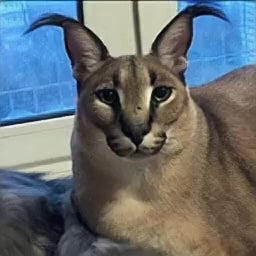

In [8]:
np.random.seed(777)
# image = np.random.uniform(size=(28, 28, 3)).astype(np.float64)
image = cv2.imread('floppa.jpg', cv2.IMREAD_COLOR).astype(np.float64)
print('Input image shape:', image.shape)
Image('floppa.jpg')

## Result

In [9]:
image = convolution(image, n_filters=5, filter_size=3)
image = normalization(image)
image = relu_activation(image)
image = max_pooling(image, filter_size=2)
# image = linear(image, 5) # for backup, not mentioned in task
image = softmax(image)
print('Result channels:', image, sep='\n')

Convolution:
	Input shape:(256, 256, 3)
	Filters: 5 of (3, 3, 3) shape
	Output shape:(254, 254, 5)
Normalization:
	Shape:(254, 254, 5)
ReLU Activation:
	Shape:(254, 254, 5)
Max Pooling:
	Input shape:(254, 254, 5)
	Filter size: 2
	Output shape:(127, 127, 5)
Softmax:
	Input shape:(127, 127, 5)
	Output shape:(16129, 5)
Result channels:
[[1.67937742e-04 1.56506936e-04 1.41678125e-04 1.24583441e-04
  1.14956862e-04]
 [1.09621970e-04 1.15585670e-04 1.29785512e-04 1.42235571e-04
  1.19926577e-04]
 [8.27194684e-05 8.27202537e-05 1.09736502e-04 1.29786878e-04
  1.08571455e-04]
 ...
 [2.70346119e-05 2.69832222e-05 2.70263049e-05 2.69776004e-05
  2.70284516e-05]
 [2.70346119e-05 2.69832222e-05 2.70263049e-05 2.69776004e-05
  2.70284516e-05]
 [2.70346119e-05 2.69832222e-05 2.70263049e-05 2.69776004e-05
  2.70284516e-05]]
